<a href="https://colab.research.google.com/github/srv/opencosmos/blob/main/opencosmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## GITHUB AND DRIVE MOUNT ##

if "setup" not in globals():
  !git clone https://@github.com/srv/opencosmos.git
  from google.colab import drive
  drive.mount('/content/drive')
  setup = True
# drive.flush_and_unmount()

Cloning into 'opencosmos'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 118 (delta 61), reused 43 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (118/118), 21.07 MiB | 21.36 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Mounted at /content/drive


In [2]:
## INSTALLS AND IMPORTS ##

# use % for terminal commands (e.g. %ls)

!pip install matplotlib
!pip install rasterio
import rasterio
import rasterio.plot
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


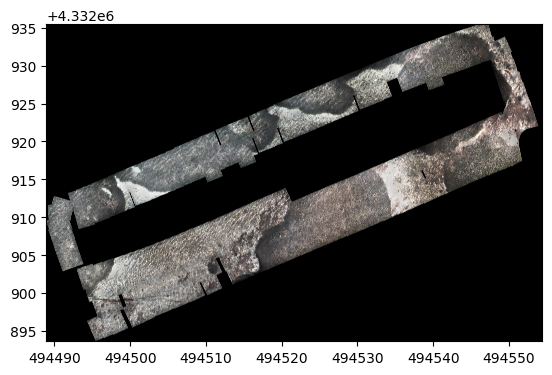

mosaic shape: (6948, 10757)
mosaic crs: EPSG:25831


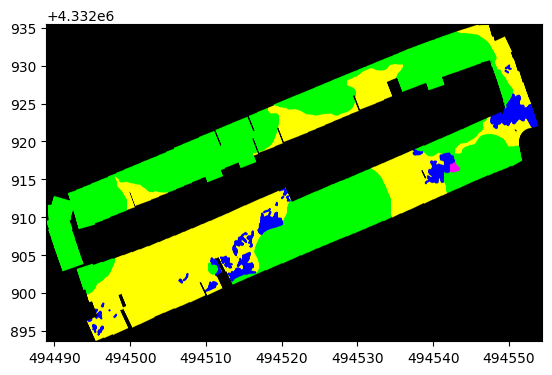

mosaic_seg shape: (6948, 10757)
mosaic_seg crs: EPSG:25831


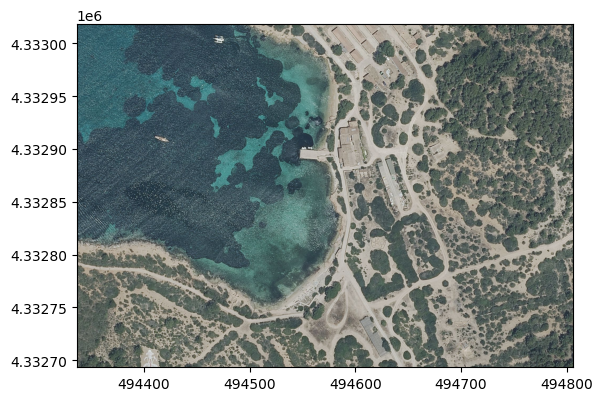

ortofoto shape: (1299, 1878)
ortofoto crs: EPSG:25831


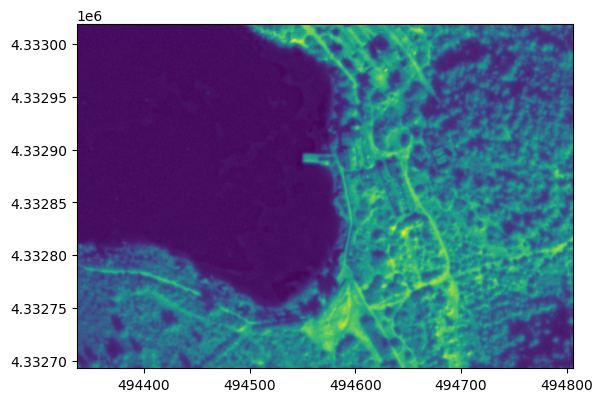

geosat shape: (434, 626)
geosat crs: EPSG:25831


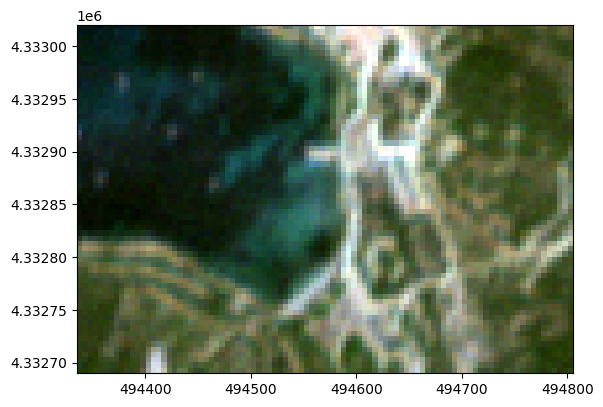

platero shape: (66, 94)
platero crs: EPSG:25831


In [3]:
## LOAD TIFS ##

# --- Mosaic ---
mosaic_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/cabrera_05_02_2025.tif"
mosaic_tif = rasterio.open(mosaic_path)
rasterio.plot.show(mosaic_tif)
print("mosaic shape:", mosaic_tif.shape)
print("mosaic crs:", mosaic_tif.crs)

# --- Mosaic segmentation ---
mosaic_seg_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/cabrera_seg_05_02_2025.tif"
mosaic_seg_tif = rasterio.open(mosaic_seg_path)
rasterio.plot.show(mosaic_seg_tif)
print("mosaic_seg shape:", mosaic_seg_tif.shape)
print("mosaic_seg crs:", mosaic_seg_tif.crs)

# --- Ortofoto ---
ortofoto_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/clip_ortofoto_Cabrera_2024.tif"
ortofoto_tif = rasterio.open(ortofoto_path)
rasterio.plot.show(ortofoto_tif)
print("ortofoto shape:", ortofoto_tif.shape)
print("ortofoto crs:", ortofoto_tif.crs)

# --- Geosat ---
geosat_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/Clip_Geosat_Cabrera_20230204.tif"
geosat_tif = rasterio.open(geosat_path)
rasterio.plot.show(geosat_tif)
print("geosat shape:", geosat_tif.shape)
print("geosat crs:", geosat_tif.crs)

# --- Platero ---
platero_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/clip_Platero_20250809.tif"
platero_tif = rasterio.open(platero_path)
rasterio.plot.show(platero_tif)
print("platero shape:", platero_tif.shape)
print("platero crs:", platero_tif.crs)






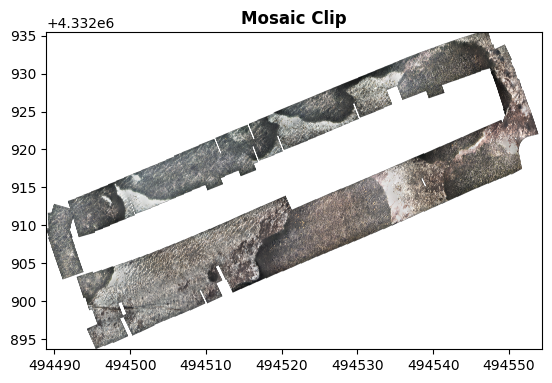

mosaic_clip shape: (4, 6948, 10757)


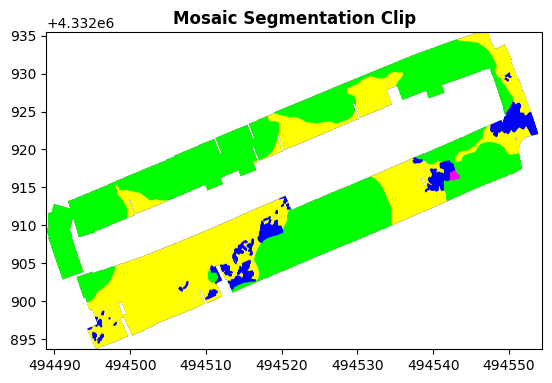

mosaic_seg_clip shape: (4, 6948, 10757)


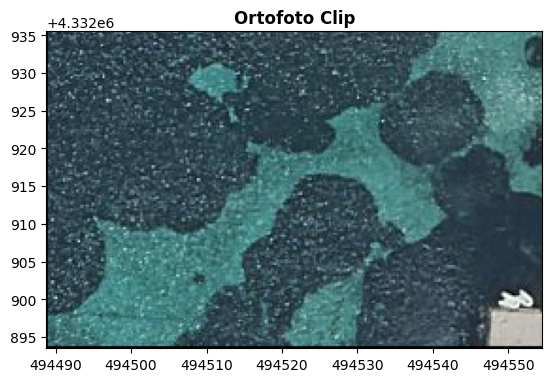

ortofoto_clip shape: (3, 168, 263)


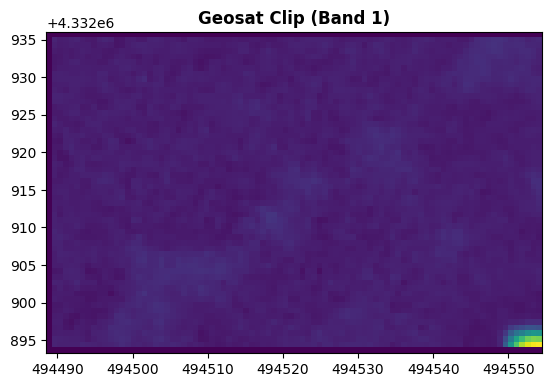

geosat_clip shape: (4, 57, 88)


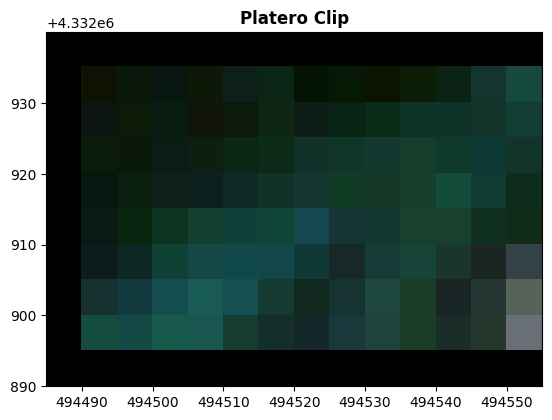

platero_clip shape: (3, 10, 14)


In [4]:
## CLIP ##

from shapely.geometry import box
from rasterio.mask import mask
import rasterio.plot

# 1️⃣ Create a polygon of the mosaic bounds
mosaic_bounds_geom = [box(*mosaic_tif.bounds)]  # list of one polygon

# 2️⃣ Define a helper function to clip any raster
def clip_raster(src_tif, bounds_geom):
    """Clip a raster to the given bounds geometry"""
    clipped_data, clipped_transform = mask(src_tif, bounds_geom, crop=True)
    return clipped_data, clipped_transform

# 3️⃣ Clip all rasters
mosaic_clip, mosaic_clip_transform = clip_raster(mosaic_tif, mosaic_bounds_geom)
rasterio.plot.show(mosaic_clip, transform=mosaic_clip_transform, title="Mosaic Clip")
print("mosaic_clip shape:", mosaic_clip.shape)

mosaic_seg_clip, mosaic_seg_clip_transform = clip_raster(mosaic_seg_tif, mosaic_bounds_geom)
rasterio.plot.show(mosaic_seg_clip, transform=mosaic_seg_clip_transform, title="Mosaic Segmentation Clip")
print("mosaic_seg_clip shape:", mosaic_seg_clip.shape)

ortofoto_clip, ortofoto_clip_transform = clip_raster(ortofoto_tif, mosaic_bounds_geom)
rasterio.plot.show(ortofoto_clip, transform=ortofoto_clip_transform, title="Ortofoto Clip")
print("ortofoto_clip shape:", ortofoto_clip.shape)

geosat_clip, geosat_clip_transform = clip_raster(geosat_tif, mosaic_bounds_geom)
rasterio.plot.show(geosat_clip[0], transform=geosat_clip_transform, title="Geosat Clip (Band 1)")
print("geosat_clip shape:", geosat_clip.shape)

platero_clip, platero_clip_transform = clip_raster(platero_tif, mosaic_bounds_geom)
rasterio.plot.show(platero_clip, transform=platero_clip_transform, title="Platero Clip")
print("platero_clip shape:", platero_clip.shape)

Target grid:
  Transform: | 0.25, 0.00, 494488.75|
| 0.00,-0.25, 4332935.50|
| 0.00, 0.00, 1.00|
  Width, Height: 263 168
  CRS: EPSG:25831
Mosaic Resampled - shape: (4, 168, 263)


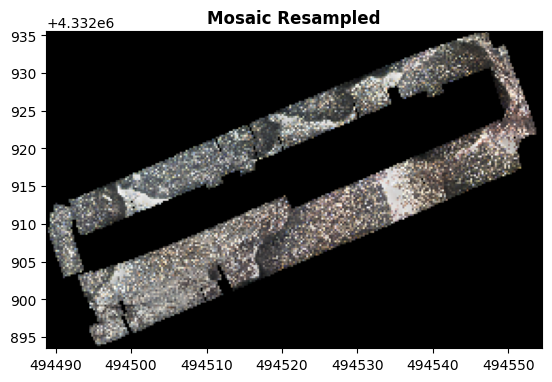

Mosaic Segmentation Resampled - shape: (4, 168, 263)


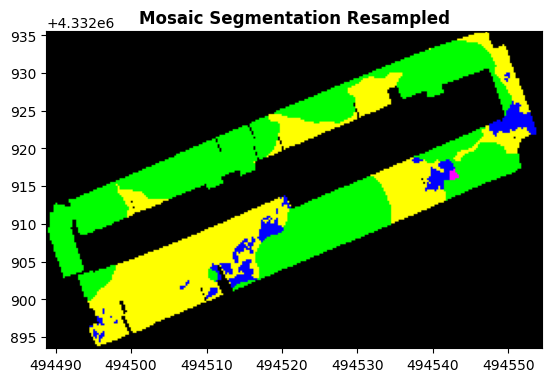

Ortofoto Resampled - shape: (3, 168, 263)


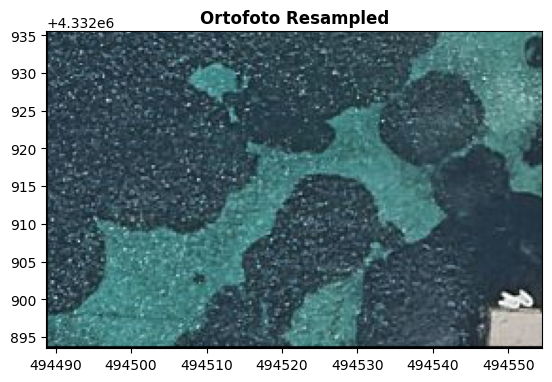

Geosat Resampled - shape: (4, 168, 263)


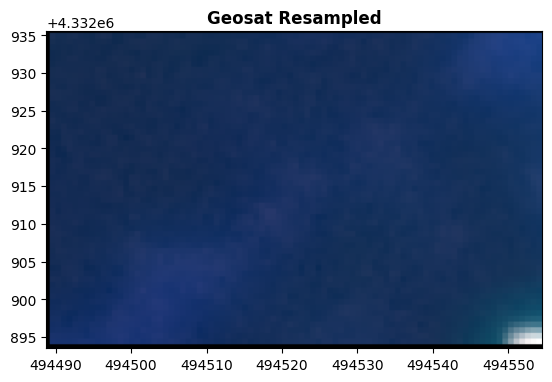

Platero Resampled - shape: (3, 168, 263)


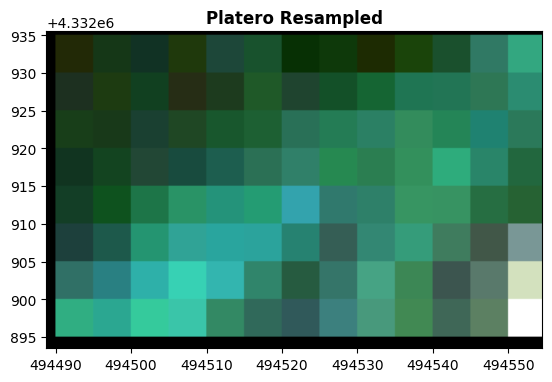


--- Shape check (all should match) ---
Mosaic: (4, 168, 263)
Mosaic Seg: (4, 168, 263)
Ortofoto: (3, 168, 263)
Geosat: (4, 168, 263)
Platero: (3, 168, 263)


In [13]:
## RESAMPLE ##

import rasterio
from rasterio.warp import reproject, Resampling
import rasterio.plot
import numpy as np
import math
from rasterio.transform import from_origin, array_bounds

# --- Function to compute target grid (not used but handy for debugging) ---
def compute_target_grid(clipped_shape, clipped_transform, target_res):
    h, w = clipped_shape[1], clipped_shape[2]
    left, bottom, right, top = array_bounds(h, w, clipped_transform)
    res_x, res_y = target_res
    width = math.ceil((right - left) / res_x)
    height = math.ceil((top - bottom) / abs(res_y))
    target_transform = from_origin(left, top, res_x, abs(res_y))
    return target_transform, width, height

# --- Resample function ---
def resample_clipped(src_array, src_transform, src_crs,
                     target_transform, target_crs,
                     target_height, target_width,
                     resampling=Resampling.nearest):
    dst = np.empty((src_array.shape[0], target_height, target_width), dtype=src_array.dtype)
    reproject(
        source=src_array,
        destination=dst,
        src_transform=src_transform,
        src_crs=src_crs,
        dst_transform=target_transform,
        dst_crs=target_crs,
        resampling=resampling,
        src_nodata=None,
        dst_nodata=0
    )
    return dst

# --- Target ---
target = "ortofoto"

# Dynamically access variables based on target name
target_transform = globals()[f"{target}_clip_transform"]
target_crs = globals()[f"{target}_tif"].crs
target_width = globals()[f"{target}_clip"].shape[2]
target_height = globals()[f"{target}_clip"].shape[1]


print("Target grid:")
print("  Transform:", target_transform)
print("  Width, Height:", target_width, target_height)
print("  CRS:", target_crs)

# --- Resample all clipped rasters to target grid ---
mosaic_resampled = resample_clipped(
    mosaic_clip, mosaic_clip_transform, mosaic_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

mosaic_seg_resampled = resample_clipped(
    mosaic_seg_clip, mosaic_seg_clip_transform, mosaic_seg_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

ortofoto_resampled = resample_clipped(
    ortofoto_clip, ortofoto_clip_transform, ortofoto_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

platero_resampled = resample_clipped(
    platero_clip, platero_clip_transform, platero_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

geosat_resampled = resample_clipped(
    geosat_clip, geosat_clip_transform, geosat_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

# --- Plotting with scaling ---
def plot_raster_scaled(array, transform, title):
    bands, h, w = array.shape
    print(f"{title} - shape: {array.shape}")
    if bands >= 3:
        scaled = np.zeros_like(array, dtype=np.float32)
        for i in range(3):
            b = array[i].astype(np.float32)
            min_val, max_val = np.nanmin(b), np.nanmax(b)
            if max_val > min_val:
                scaled[i] = (b - min_val) / (max_val - min_val)
            else:
                scaled[i] = b
        rasterio.plot.show(scaled[[0, 1, 2]], transform=transform, title=title)
    else:
        b = array[0].astype(np.float32)
        min_val, max_val = np.nanmin(b), np.nanmax(b)
        if max_val > min_val:
            b_scaled = (b - min_val) / (max_val - min_val)
        else:
            b_scaled = b
        rasterio.plot.show(b_scaled, transform=transform, title=title)

# --- Plot all rasters ---
plot_raster_scaled(mosaic_resampled, target_transform, "Mosaic Resampled")
plot_raster_scaled(mosaic_seg_resampled, target_transform, "Mosaic Segmentation Resampled")
plot_raster_scaled(ortofoto_resampled, target_transform, "Ortofoto Resampled")
plot_raster_scaled(geosat_resampled, target_transform, "Geosat Resampled")
plot_raster_scaled(platero_resampled, target_transform, "Platero Resampled")

# --- Shape & consistency checks ---
print("\n--- Shape check (all should match) ---")
print("Mosaic:", mosaic_resampled.shape)
print("Mosaic Seg:", mosaic_seg_resampled.shape)
print("Ortofoto:", ortofoto_resampled.shape)
print("Geosat:", geosat_resampled.shape)
print("Platero:", platero_resampled.shape)


New shape with NDVI + 3 PCA layers: (8, 168, 263)
Normalized per-layer minimums:
 [ 0.          0.          0.          0.         -0.50497866 -0.0332116
 -0.00433608 -0.00175797]
Normalized per-layer maximums:
 [0.09684901 0.06161593 0.05279622 0.04632639 0.22916456 0.09277984
 0.05738523 0.00694689]
Number of unique values per layer:
 [538 431 613 432]
Number of unique values per layer:
 [ 538  431  613  432 4501 4785 4785 4785]


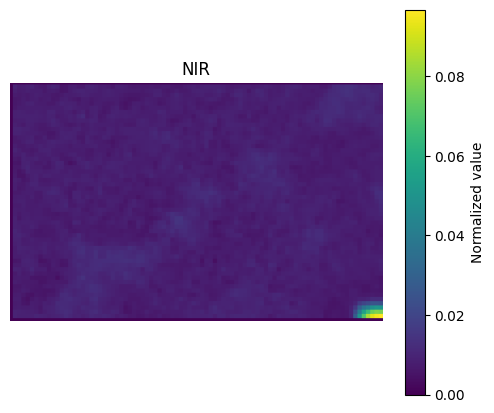

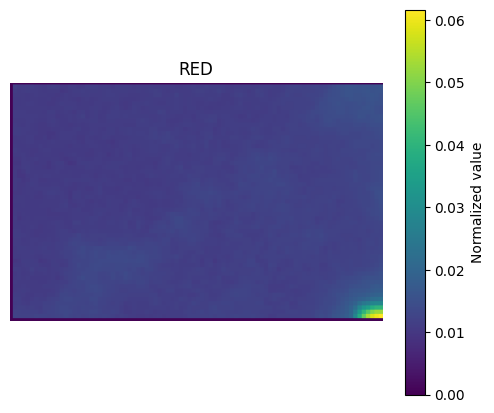

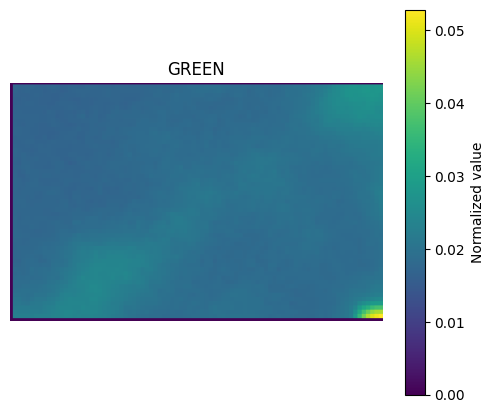

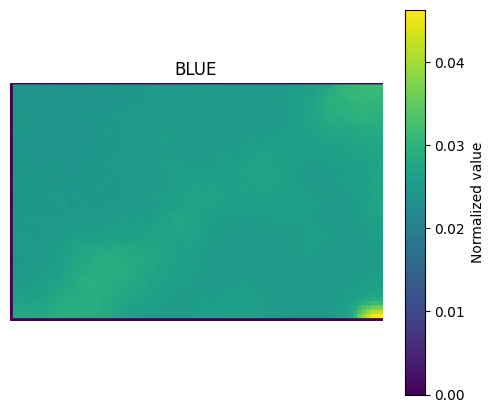

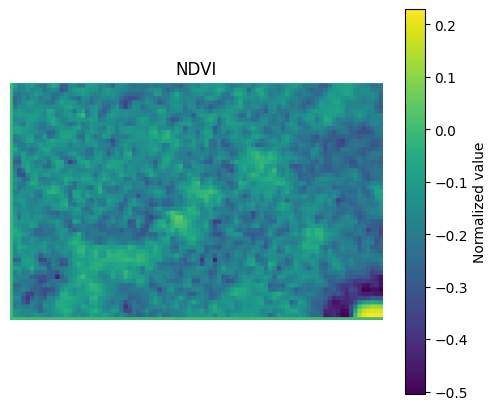

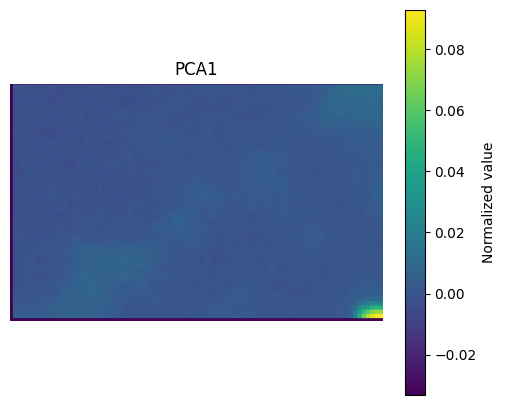

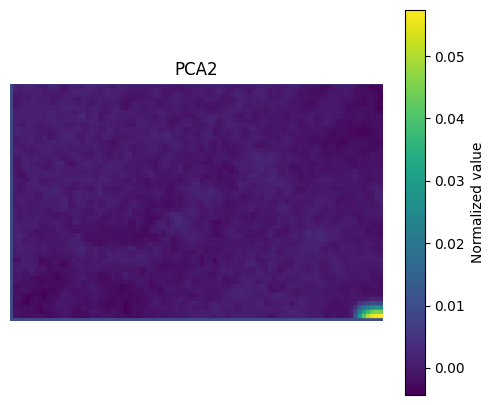

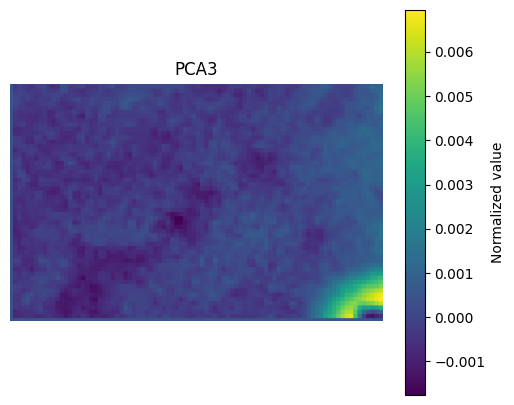

In [10]:
## LAYERS ##

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import numpy as np
from sklearn.decomposition import PCA

# --- 1. Load reference and target ---
ref = mosaic_seg_resampled

# --- 1. Normalize target_resampled using UInt16 full range ---
min_val = 0
max_val = 65535

target_resampled = geosat_resampled
target_resampled_normalized = (target_resampled - min_val) / (max_val - min_val + 1e-10)

# --- 2. Compute NDVI and append as new layer ---
ndvi = (target_resampled_normalized[0] - target_resampled_normalized[1]) / \
       (target_resampled_normalized[0] + target_resampled_normalized[1] + 1e-10)
ndvi = np.expand_dims(ndvi, axis=0)
# target_resampled_normalized = np.concatenate((target_resampled_normalized, ndvi), axis=0)

# --- 3. Prepare data for PCA (layers x height x width → pixels x features) ---
layers, H, W = target_resampled_normalized.shape
X = target_resampled_normalized.reshape(layers, -1).T  # shape: (H*W, layers)

# --- 4. Apply PCA (3 components) ---
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)  # shape: (H*W, 3)

# --- 5. Reshape PCA components back to 2D layers ---
pca_layers = X_pca.T.reshape(n_components, H, W)  # shape: (3, H, W)

# --- 6. Append PCA layers to the normalized array ---
pca1 = np.expand_dims(pca_layers[0], axis=0)
pca2 = np.expand_dims(pca_layers[1], axis=0)
pca3 = np.expand_dims(pca_layers[2], axis=0)

target_resampled_normalized = np.concatenate((target_resampled_normalized, ndvi, pca1, pca2, pca3),axis=0)

print("New shape with NDVI + 3 PCA layers:", target_resampled_normalized.shape)

norm_min = target_resampled_normalized.min(axis=(1, 2), keepdims=True)
norm_max = target_resampled_normalized.max(axis=(1, 2), keepdims=True)
print("Normalized per-layer minimums:\n", norm_min.squeeze())
print("Normalized per-layer maximums:\n", norm_max.squeeze())

# Count unique values per layer
unique_counts = np.array([np.unique(layer).size for layer in target_resampled])
print("Number of unique values per layer:\n", unique_counts)
unique_counts = np.array([np.unique(layer).size for layer in target_resampled_normalized])
print("Number of unique values per layer:\n", unique_counts)

import matplotlib.pyplot as plt

layers, H, W = target_resampled_normalized.shape

# Optional: create layer names for clarity
layer_names = ['NIR','RED','GREEN','BLUE','NDVI', 'PCA1', 'PCA2', 'PCA3']

for i in range(layers):
    plt.figure(figsize=(6, 5))
    plt.imshow(target_resampled_normalized[i], cmap='viridis')  # you can change colormap
    plt.title(layer_names[i] if i < len(layer_names) else f'Layer {i+1}')
    plt.colorbar(label='Normalized value')
    plt.axis('off')
    plt.show()


Processing combinations: 100%|██████████| 255/255 [06:39<00:00,  1.57s/it]



=== Best combination ===
Bands: ['NIR', 'Red', 'Blue', 'PCA1']
OOB Accuracy: 0.9026
Eval Accuracy: 0.9083


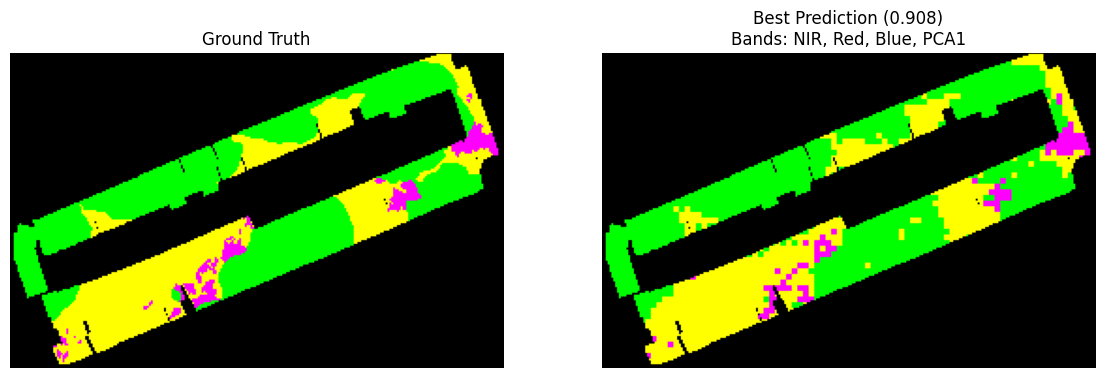

In [20]:
## FOREST ##
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import pandas as pd
from tqdm import tqdm
#from tqdm.notebook import tqdm  # Colab-friendly progress bar

# -----------------------------
# 0. Select classes and layers
# -----------------------------
class_names = ["Alive Po", "Dead Po", "Rocks", "Sand"]
selected_class_names = ["Alive Po", "Sand"]

layer_names = ["NIR", "Red", "Green", "Blue", "NDVI", "PCA1", "PCA2", "PCA3"]

train_pct = 0.2  # fraction of valid pixels for training

# -----------------------------
# 1. Pre-mask ref and target
# -----------------------------
alpha_mask = ref[3] > 0
target_rgb = target_resampled_normalized[[1, 2, 3]]
target_not_black = np.any(target_rgb > 0, axis=0)
combined_mask = alpha_mask & target_not_black

ref_masked = np.zeros_like(ref)
target_masked = np.zeros_like(target_resampled_normalized)
for i in range(ref.shape[0]):
    ref_masked[i] = ref[i] * combined_mask
for i in range(target_resampled_normalized.shape[0]):
    target_masked[i] = target_resampled_normalized[i] * combined_mask

# -----------------------------
# 2. Map RGB to numeric classes
# -----------------------------
class_name_to_rgb = {
    "Alive Po": [(0, 255, 0)],
    "Dead Po": [(0, 0, 255)],
    "Rocks": [(255, 0, 0)],
    "Sand": [(255, 255, 0)],
    "Others": [(255, 0, 255)]
}

others_class_index = len(selected_class_names)
labels = np.full(ref.shape[1:], -1, dtype=int)

for name, rgb_list in class_name_to_rgb.items():
    mask_total = np.zeros(ref.shape[1:], dtype=bool)
    for rgb in rgb_list:
        mask = (
            (ref_masked[0] == rgb[0]) &
            (ref_masked[1] == rgb[1]) &
            (ref_masked[2] == rgb[2])
        )
        mask_total |= mask
    if name in selected_class_names:
        labels[mask_total] = selected_class_names.index(name)
    else:
        labels[mask_total] = others_class_index

background_mask = ref[3] == 0
valid_pixels = combined_mask & (~background_mask) & (labels >= 0)

# ------------------------------------------
# 3. Generate all band combinations
# ------------------------------------------
all_combinations = [list(combo)
                    for r in range(1, len(layer_names) + 1)
                    for combo in itertools.combinations(layer_names, r)]

results = []

# ------------------------------------------
# 4. Loop through each band combination with tqdm
# ------------------------------------------
for selected_layer_names in tqdm(all_combinations, desc="Processing combinations"):
    try:
        # Prepare features
        selected_layers = [layer_names.index(name) for name in selected_layer_names]
        X_full = target_masked[selected_layers].reshape(len(selected_layers), -1).T
        y = labels.flatten()

        # Training subsample
        valid_indices = np.where(valid_pixels.flatten())[0]
        n_train = int(len(valid_indices) * train_pct)
        np.random.seed(42)
        selected_indices = np.random.choice(valid_indices, size=n_train, replace=False)

        X_train_sub = X_full[selected_indices]
        y_train_sub = y[selected_indices]

        # Random Forest training
        rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=20,
            random_state=42,
            n_jobs=-1,
            oob_score=True
        )
        rf.fit(X_train_sub, y_train_sub)

        # Predict all pixels
        y_pred = rf.predict(X_full)
        pred_map = y_pred.reshape(ref.shape[1:])
        pred_map_masked = np.full_like(pred_map, -1)
        pred_map_masked[combined_mask] = pred_map[combined_mask]

        # Evaluation excluding training pixels
        H, W = ref.shape[1:]
        train_mask = np.zeros_like(combined_mask.flatten(), dtype=bool)
        train_mask[selected_indices] = True
        eval_mask = combined_mask.flatten() & (~train_mask)

        y_true_eval = labels.flatten()[eval_mask]
        y_pred_eval = pred_map_masked.flatten()[eval_mask]

        accuracy_eval = np.mean(y_true_eval == y_pred_eval)
        oob_acc = rf.oob_score_

        results.append({
            "Bands": selected_layer_names,
            "NumBands": len(selected_layer_names),
            "OOB_Accuracy": oob_acc,
            "Eval_Accuracy": accuracy_eval
        })

    except Exception as e:
        print(f"Error with {selected_layer_names}: {e}")
        continue

# ------------------------------------------
# 6. Retrain and plot best combination
# ------------------------------------------
results_df = pd.DataFrame(results)
results_df.sort_values(by="Eval_Accuracy", ascending=False, inplace=True)

best_row = results_df.iloc[0]
best_bands = best_row["Bands"]
print("\n=== Best combination ===")
print(f"Bands: {best_bands}")
print(f"OOB Accuracy: {best_row['OOB_Accuracy']:.4f}")
print(f"Eval Accuracy: {best_row['Eval_Accuracy']:.4f}")

selected_layer_names = best_bands
selected_layers = [layer_names.index(name) for name in selected_layer_names]
X_full = target_masked[selected_layers].reshape(len(selected_layers), -1).T
y = labels.flatten()

valid_indices = np.where(valid_pixels.flatten())[0]
n_train = int(len(valid_indices) * train_pct)
np.random.seed(42)
selected_indices = np.random.choice(valid_indices, size=n_train, replace=False)

X_train_sub = X_full[selected_indices]
y_train_sub = y[selected_indices]

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1,
    oob_score=True
)
rf.fit(X_train_sub, y_train_sub)

y_pred = rf.predict(X_full)
pred_map = y_pred.reshape(ref.shape[1:])
pred_map_masked = np.full_like(pred_map, -1)
pred_map_masked[combined_mask] = pred_map[combined_mask]

# Visualization: GT vs Best Prediction
H, W = ref.shape[1:]
rgb_pred = np.zeros((H, W, 3))
rgb_gt = np.zeros((H, W, 3))

class_colors = {}
for i, name in enumerate(selected_class_names):
    rgb_255 = class_name_to_rgb[name][0]
    class_colors[i] = tuple(np.array(rgb_255) / 255.0)
rgb_255 = class_name_to_rgb["Others"][0]
class_colors[len(selected_class_names)] = tuple(np.array(rgb_255) / 255.0)

for cls, color in class_colors.items():
    rgb_pred[pred_map_masked == cls] = color
    rgb_gt[labels == cls] = color

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(rgb_gt)
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_pred)
plt.title(f"Best Prediction ({best_row['Eval_Accuracy']:.3f})\nBands: {', '.join(best_bands)}")
plt.axis("off")
plt.show()
